In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Distanza di Manhattan
# https://it.wikipedia.org/wiki/Geometria_del_taxi
def manhattan_distance(x, y):
    return sum(abs(a-b) for a,b in zip(x,y))
# Distanza Euclidea
# https://it.wikipedia.org/wiki/Distanza_euclidea
def euclidean_distance(x, y):
    return sum((a-b)**2 for a, b in zip(x, y))**0.5

# get specific columns from the dataset
columns_needed =  [
    'datetime',
    'Neck.px', 'Neck.py', 'Neck.pz',
    'ShoulderLeft.px', 'ShoulderLeft.py', 'ShoulderLeft.pz',
    'ShoulderRight.px', 'ShoulderRight.py', 'ShoulderRight.pz',
    'ElbowLeft.px', 'ElbowLeft.py', 'ElbowLeft.pz',
    'ElbowRight.px', 'ElbowRight.py', 'ElbowRight.pz',
    'WristLeft.px', 'WristLeft.py', 'WristLeft.pz',
    'WristRight.px', 'WristRight.py', 'WristRight.pz',
    'HipLeft.px', 'HipLeft.py', 'HipLeft.pz',
    'HipRight.px', 'HipRight.py', 'HipRight.pz',
    'KneeLeft.px', 'KneeLeft.py', 'KneeLeft.pz',
    'KneeRight.px', 'KneeRight.py', 'KneeRight.pz',
    'AnkleLeft.px', 'AnkleLeft.py', 'AnkleLeft.pz',
    'AnkleRight.px', 'AnkleRight.py', 'AnkleRight.pz'
]

In [4]:
# get all the csv files from the dataset that are related to a specific movement
# each movement may have multiple repetitions
def get_movement_files(m):
    directory = '/home/Lucian/Github/Thesis/FoF-Analysis-Viz/dataset'
    files = {}
    for patients in os.listdir(directory):
        f = os.path.join(directory, patients)
        if patients.startswith('P'):
            if patients not in files:
                files[patients] = []
        if os.path.isdir(f):
            for movement in os.listdir(f):
                g = os.path.join(f, movement)
                if os.path.isdir(g) and movement == m:
                    for repetition in os.listdir(g):
                        h = os.path.join(g, repetition)
                        if os.path.isdir(h):
                            for file in os.listdir(h):
                                if file.endswith('.csv'):
                                    result = os.path.join(h, file)
                                    files[patients].append(result)     
    # sort the patients by the endidng number of their name
    files = dict(sorted(files.items(), key=lambda item: item[0][1:]))           
    return files
# list the files 
def list_files(files):
    for patient, movements in files.items():
        print(patient)
        for movement in movements:
            print('\t', movement)
# get the dataframes from each file and keep only the columns needed 
def get_dataframe_from_file(files, columns_needed):
   dataframes = {}
   for patient, movements in files.items():
       if patient not in dataframes:
           dataframes[patient] = []
       for movement in movements:
           df = pd.read_csv(movement, sep=';')
           df = df[columns_needed]
           dataframes[patient].append(df)
   return dataframes         
           
def get_tuple_from_row(df, x, y, z):
    return df[[x, y, z]].apply(tuple, axis=1)

def get_values_from_df(dataframes, x, y, z):
    values = {}
    for patient, movements in dataframes.items():
        if patient not in values:
            values[patient] = []
        for movement in movements:
            result = get_tuple_from_row(movement, x, y, z)
            if result is not None:
                values[patient].append(result)
    return values

files = get_movement_files('M000')  
dataframes = get_dataframe_from_file(files, columns_needed)
hip_right  = get_values_from_df(dataframes,'HipRight.px', 'HipRight.py', 'HipRight.pz')
hip_left = get_values_from_df(dataframes,'HipLeft.px', 'HipLeft.py', 'HipLeft.pz')
knee_right = get_values_from_df(dataframes,'KneeRight.px', 'KneeRight.py', 'KneeRight.pz')
knee_left = get_values_from_df(dataframes,'KneeLeft.px', 'KneeLeft.py', 'KneeLeft.pz')


### Range of Motion 

Patient-1
Patient-2
Patient-3
Patient-4
Patient-5
Patient-6
Patient-7


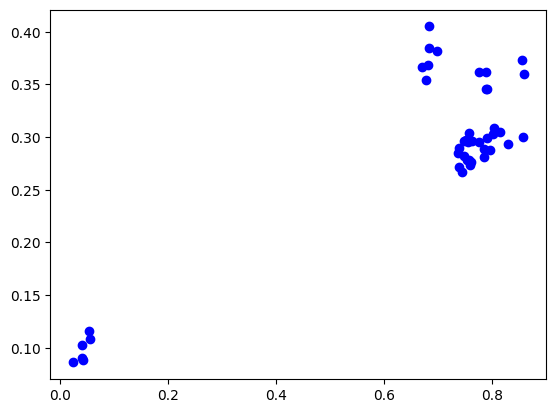

In [10]:
def range_of_motion(values):
    results = {}
    for patient, movements in values.items():
        if patient not in results:
            results[patient] = []
        for movement in movements:
            coordinates = []
            result = []
            for row in movement:
                coordinates.append(row)
            range_x = np.max(coordinates, axis=0)[0] - np.min(coordinates, axis=0)[0]
            range_y = np.max(coordinates, axis=0)[1] - np.min(coordinates, axis=0)[1]
            range_z = np.max(coordinates, axis=0)[2] - np.min(coordinates, axis=0)[2]
            result.append(range_x)
            result.append(range_y)
            result.append(range_z)
            results[patient].append(result)
    return results
hip_motions_right = range_of_motion(hip_right)
hip_motions_left = range_of_motion(hip_left)

knee_left_motions = range_of_motion(knee_left)
knee_right_motions = range_of_motion(knee_right)

# scatter plot the x and y values from the motions 
def scatter_plot(left, right):
    #TODO: merge the two dictionaries
    color = 'blue'
    for patient, movements in left.items():
        if patient == 'Patient-1':
            color = 'red'
        else:
            color = 'blue'
        for movement in movements:
            plt.scatter(movement[0], movement[1], color = color)
    for patient, movements in right.items():
        if patient == 'Patient-1':
            color = 'red'
        else:
            color = 'blue'
        for movement in movements:
            plt.scatter(movement[0], movement[1], color = color)
            
    plt.show()

scatter_plot(hip_motions_right, hip_motions_left)
#scatter_plot(knee_left_motions, knee_right_motions)

In [ ]:
def calculate_manhattan_distance(values):
    distances = {}
    for patient, movements in values.items():
        if patient not in distances:
            distances[patient] = []
        for i in range(1, 50):
            point1 = movements[i-1]
            point2 = movements[i]
            print(point1, point2)
            #distance = manhattan_distance(point1, point2)
            #print(distance)
            #distances[patient].append(distance)

